In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')



In [19]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
df.shape

(5572, 5)

In [23]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

<h1>Data cleaning</h1>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [28]:
# mujhe unnamed ka koi kaam dikh nhi rha 

In [32]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [34]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [38]:
df=df.rename(columns={'v1':'target','v2':'value'})

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
df['target']=le.fit_transform(df['target'])

In [44]:
df

,target,value
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [48]:
df.duplicated().sum()


np.int64(403)

In [50]:
df=df.drop_duplicates(keep='first')

In [52]:
df.duplicated().sum()

np.int64(0)

In [54]:
df.shape

(5169, 2)

<h1>EDA</h1>

In [57]:
#let me check if whether the no of email is more spam or not 

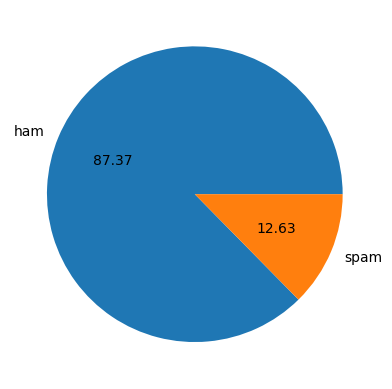

In [59]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [61]:
#data is imbalanced 

In [63]:
import scipy.stats as stats


((array([-3.64424686, -3.4094457 , -3.28006137, ...,  3.28006137,
          3.4094457 ,  3.64424686], shape=(5169,)),
  array([0, 0, 0, ..., 1, 1, 1], shape=(5169,))),
 (np.float64(0.20753690404472264),
  np.float64(0.12633004449603402),
  np.float64(0.6242908527940024)))

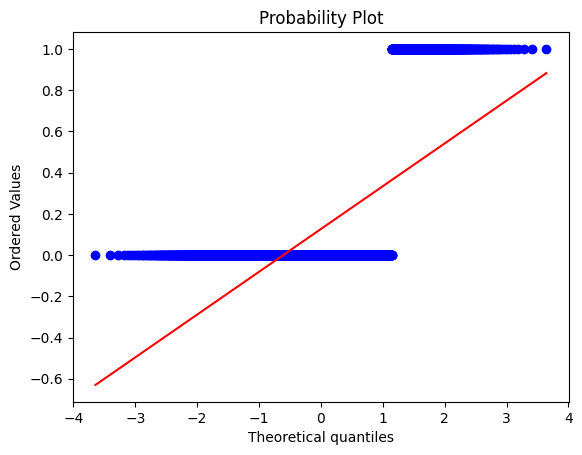

In [67]:
stats.probplot(df['target'],dist="norm",plot=plt)

In [69]:
#now clearly data is imbalanced

In [71]:
!pip install nltk



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import nltk


In [75]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jatin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [81]:
df.loc[:, 'num_characters'] = df['value'].apply(len)



In [83]:
df

,target,value,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [91]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jatin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [109]:
import nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [113]:
def word_count(text):
    words = text.split()  # Split the text by spaces
    return len(words)  # Return the number of words

# Apply the function to the 'value' column
df['num_words'] = df['value'].apply(word_count)

In [115]:
df

,target,value,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [117]:
def sentence_count(text):
    # Split by sentence-ending punctuation
    sentences = [s for s in text.split('.') if s.strip()]  # Splitting by period, you can extend it
    sentences += [s for s in text.split('!') if s.strip()]  # Splitting by exclamation mark
    sentences += [s for s in text.split('?') if s.strip()]  # Splitting by question mark
    
    return len(sentences)  # Return the number of sentences

# Apply the function to the 'value' column
df['num_sentences'] = df['value'].apply(sentence_count)

In [119]:
df

,target,value,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,5
1,0,Ok lar... Joking wif u oni...,29,6,4
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,4
3,0,U dun say so early hor... U c already then say...,49,11,4
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,3
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,7
5568,0,Will Ì_ b going to esplanade fr home?,37,8,3
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,5
5570,0,The guy did some bitching but I acted like i'd...,125,26,3


In [121]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,4.315341
std,58.236293,11.068488,1.656794
min,2.000000,1.000000,3.000000
25%,36.000000,7.000000,3.000000
50%,60.000000,12.000000,4.000000
75%,117.000000,22.000000,5.000000
max,910.000000,171.000000,33.000000


<Axes: xlabel='num_characters', ylabel='Count'>

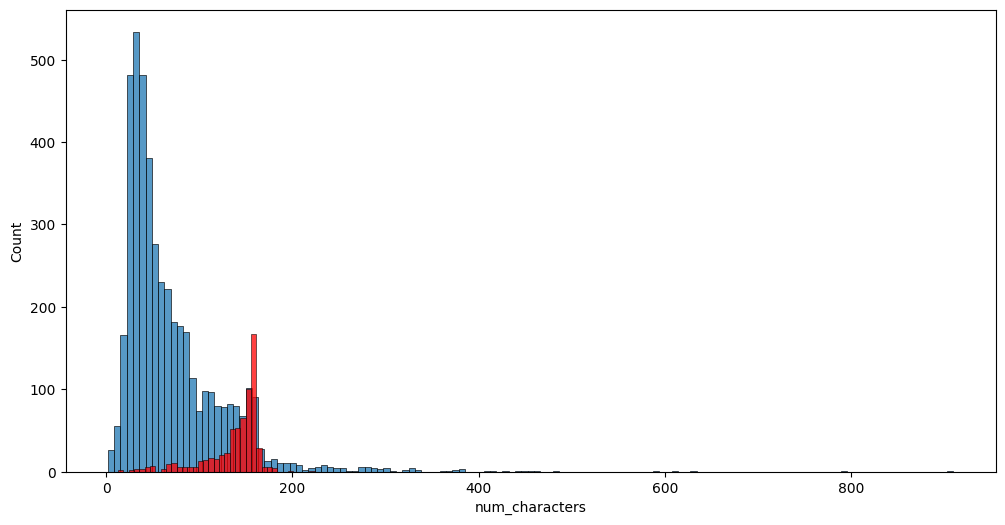

In [129]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters']) #ham msg me no of character use hore km hai 
sns.histplot(df[df['target'] == 1]['num_characters'],color='red') #spam

<Axes: xlabel='num_words', ylabel='Count'>

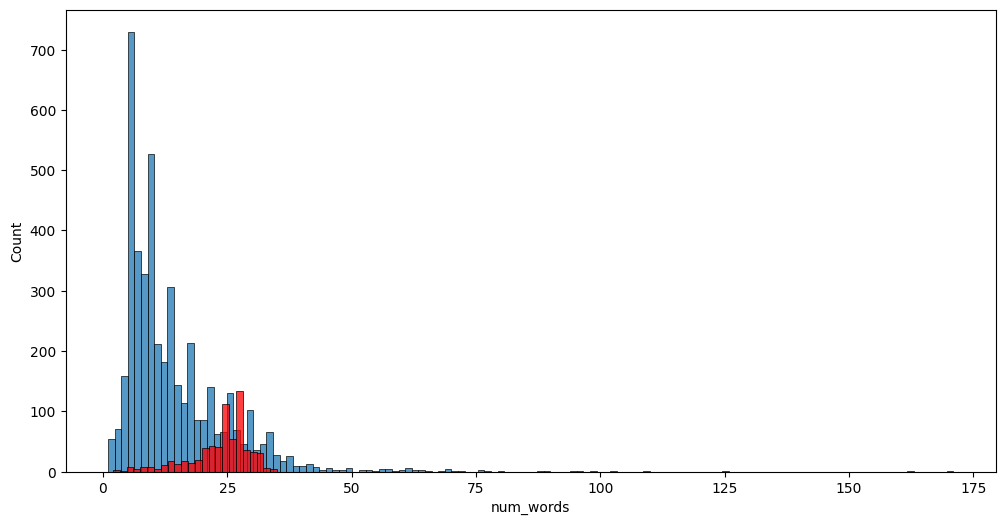

In [133]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words']) 
sns.histplot(df[df['target'] == 1]['num_words'],color='red') #spam
#dono me lagbhag barabr hai 

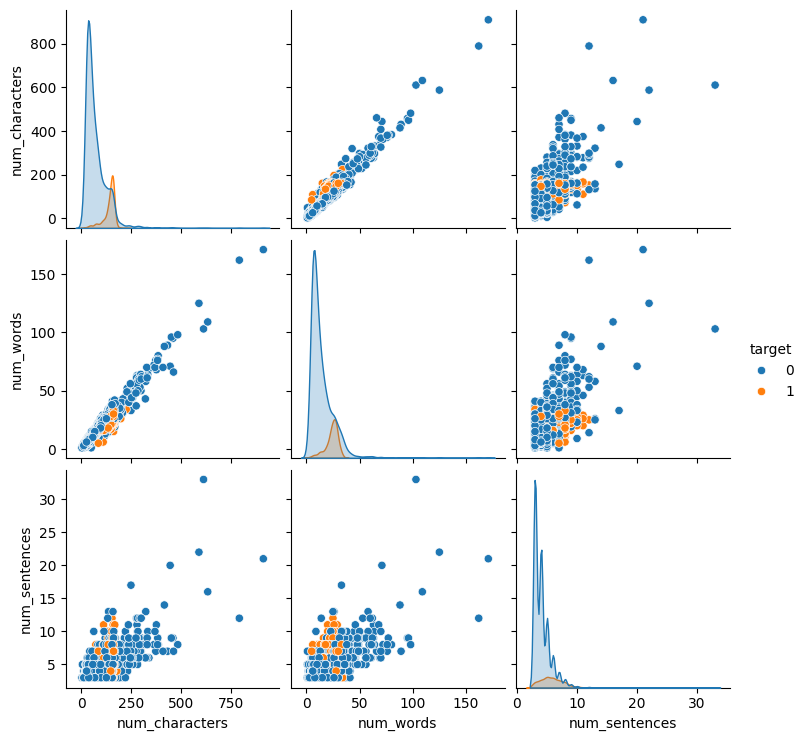

In [135]:
sns.pairplot(df,hue='target')

<h1>Data Preprocessing</h1>



Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [149]:
#first is to convert to lower case 

def tokenize_with_split(text):
    text = text.lower()  # Lowercase the text
    tokens = text.split()  # Split on whitespace
    return tokens
    

In [153]:
tokenize_with_split("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


["i'm",
 'gonna',
 'be',
 'home',
 'soon',
 'and',
 'i',
 "don't",
 'want',
 'to',
 'talk',
 'about',
 'this',
 'stuff',
 'anymore',
 'tonight,',
 'k?',
 "i've",
 'cried',
 'enough',
 'today.']

In [171]:
stopwords = {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'you', "you're", "you've", 'your', 
             'yours', 'he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 
             'their', 'theirs', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 
             'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 
             'had', 'do', 'does', 'did', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 
             'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'to', 'in', 'on'}

In [189]:
import string
def transform_text(text):
    text = text.lower()  # Lowercase the text
    text = text.split()  # Split on whitespace
    
    # Remove special characters and keep alphanumeric tokens
    y = [i.strip(string.punctuation) for i in text if i.strip(string.punctuation)]
    
    # Filter out stopwords
    result = [i for i in y if i and i not in stopwords]
    
    # Join the filtered tokens into a string
    return " ".join(result)

In [191]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


"i'm gonna home soon don't want talk stuff anymore tonight k i've cried enough today"

In [193]:
df['transformed_text']=df['value'].apply(transform_text)

In [195]:
df

,target,value,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,5,go jurong point crazy available only bugis n g...
1,0,Ok lar... Joking wif u oni...,29,6,4,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,4,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,4,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,3,nah don't think goes usf lives around here though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,7,2nd time tried 2 contact u u won å£750 pound p...
5568,0,Will Ì_ b going to esplanade fr home?,37,8,3,will ì b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,5,pity mood so...any other suggestions
5570,0,The guy did some bitching but I acted like i'd...,125,26,3,guy some bitching acted like i'd interested bu...


In [199]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [203]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))# transformed text ke string ko cat krdo sep krek

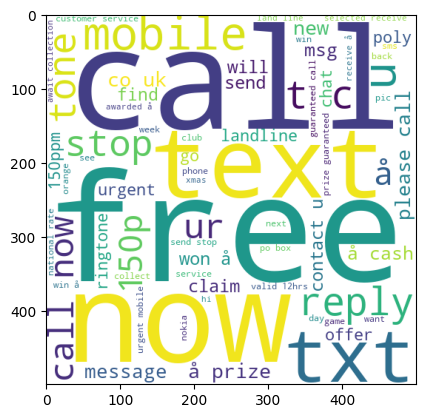

In [205]:
plt.imshow(spam_wc)

In [207]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


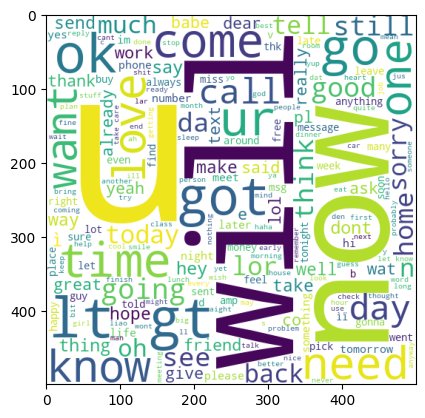

In [209]:
plt.imshow(ham_wc)

In [211]:

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [213]:
len(spam_corpus)


11749

In [223]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,302
1,free,188
2,now,156
3,2,155
4,txt,126
5,u,123
6,from,119
7,ur,119
8,mobile,105
9,text,103


In [215]:
#top 30 words used in spam msg 

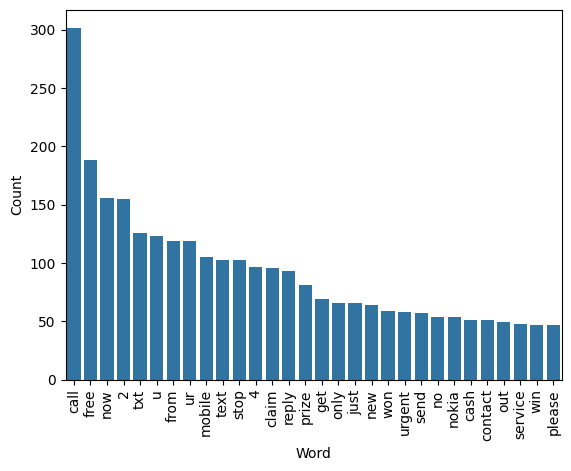

In [227]:

word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using sns.barplot with keyword arguments
sns.barplot(x='Word', y='Count', data=word_counts)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

<h1>Model Building</h1>

In [230]:
#textual data me model naive bayes ka aata hai 

In [232]:
#text_vectorisation

In [234]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [236]:
X = cv.fit_transform(df['transformed_text']).toarray()


In [244]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 8656))

In [248]:
X.shape #5169 sms and #8659 words

(5169, 8656)

In [250]:
y=df['target'].values

In [252]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [254]:
from sklearn.model_selection import train_test_split


In [256]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [258]:
from sklearn.linear_model import LogisticRegression

In [260]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [262]:
lr=LogisticRegression()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [264]:
lr.fit(X_train,y_train)

LogisticRegression()

In [266]:
y_pred=lr.predict(X_test)

In [268]:
print('accuracy_Score:',accuracy_score(y_test,y_pred))
print('precision_Score:',precision_score(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))

accuracy_Score: 0.9758220502901354
precision_Score: 0.9829059829059829
confusion_matrix: [[894   2]
 [ 23 115]]


In [270]:

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9168278529980658
[[825  71]
 [ 15 123]]
0.634020618556701


In [272]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[878  18]
 [  7 131]]
0.8791946308724832


In [274]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9758220502901354
[[893   3]
 [ 22 116]]
0.9747899159663865


In [284]:
clfs={'lr':lr,
      'gnb':gnb,
      'mnb':mnb,
      'bnb':bnb}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision


accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

    
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


For  lr
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  gnb
Accuracy -  0.9168278529980658
Precision -  0.634020618556701
For  mnb
Accuracy -  0.9758220502901354
Precision -  0.8791946308724832
For  bnb
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


In [286]:
performance_df

,Algorithm,Accuracy,Precision
0,lr,0.975822,0.982906
3,bnb,0.975822,0.974790
2,mnb,0.975822,0.879195
1,gnb,0.916828,0.634021


In [288]:
import pickle

In [292]:
pickle.dump(lr,open('lrmodel.pkl','wb'))
pickle.dump(cv,open('cvmodel.pkl','wb'))